<h3>Statement</h3>
A US bike-sharing provider BoomBikes, wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

<h5>Goal</h5>

We are required to model the demand for shared bikes with the available independent variables. 

It will be used by the management to understand how exactly the demands vary with different features so they can manipulate their strategy to meet the demand levels and customer's expectations. 

Further, our generated model should provide a good understanding of the demand dynamics of a new market. 

In [131]:
import numpy as np
import pandas as pd

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


<h2> Reading and Understanding data </h2>

In [134]:
bikeSharingDF = pd.read_csv("day.csv")

In [135]:
bikeSharingDF.shape

(730, 16)

In [136]:
bikeSharingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From above information, we can see that no variables are having any missing values and have proper datatypes set

In [137]:
bikeSharingDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From above infomration, we can have a rough idea that distribution of values acrross all fields are proper and there should not be any outliers present

In [138]:
bikeSharingDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h3>Data Cleaning<h3>

<h5>Checking for outliers in continious variables</h5>

<AxesSubplot:xlabel='windspeed'>

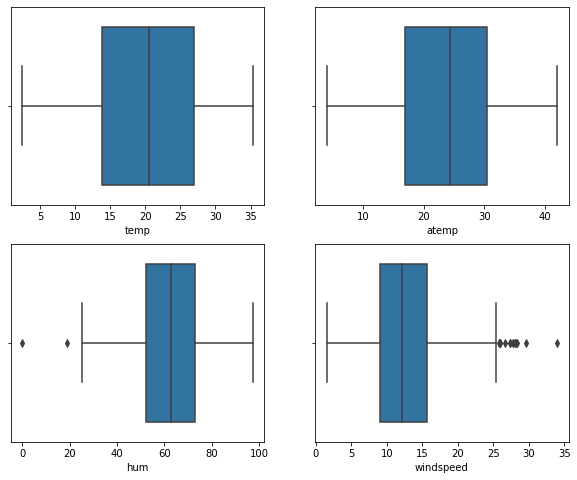

In [139]:
plt.figure(figsize = (10,8))

plt.subplot(2,2, 1)
sns.boxplot(x ='temp', data = bikeSharingDF)

plt.subplot(2,2, 2)
sns.boxplot(x ='atemp', data = bikeSharingDF)

plt.subplot(2,2, 3)
sns.boxplot(x ='hum', data = bikeSharingDF)

plt.subplot(2,2, 4)
sns.boxplot(x ='windspeed', data = bikeSharingDF)

* From above analysis, we already know that there are total 730 records and No fields are having null values in this records

* No Significant outliers are present in 'temp', 'atemp', 'hum', 'windspeed' while 'instant' is serial variable and casual, registered are directly related to dependant variables.

* We also know that the data type are proper for all the variables

So now as we already know, that there are no Missing values or improper values present in the dataset

Lets Remove known unnecessary columns (instant, duplicate or not adding any values)

In [140]:
#dteday : as it is just a date and we already have other colums 'yr' and 'mnth' to get this information
#casual and registered : This columns are directly related with the target variable
bikeSharingDF = bikeSharingDF.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

<h3>Visulising distribution and correction of different Variables</h3>

<h5>Visulising the distribution of different variables</h5>

<AxesSubplot:xlabel='weathersit', ylabel='Count'>

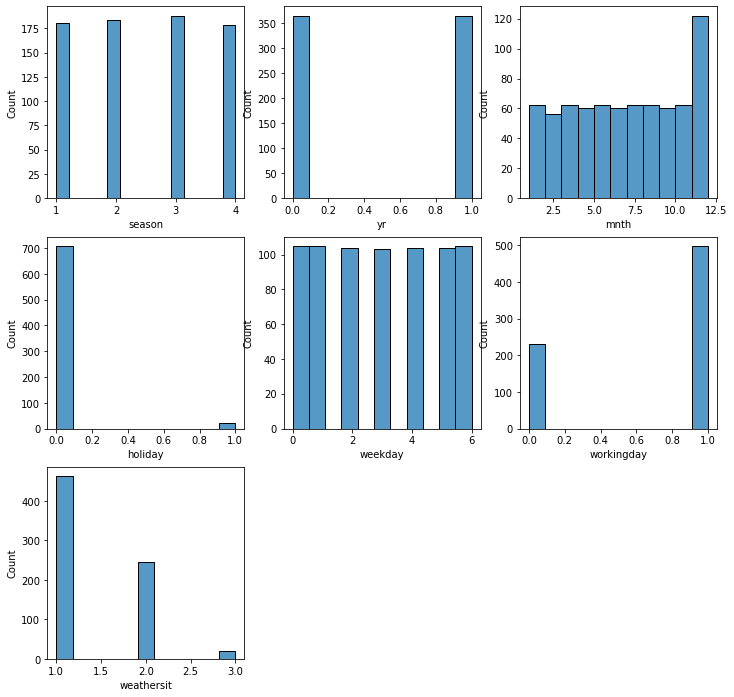

In [141]:

plt.figure(figsize = (12,12))

plt.subplot(3,3, 1)
sns.histplot(data=bikeSharingDF, x="season")

plt.subplot(3,3, 2)
sns.histplot(data=bikeSharingDF, x="yr")

plt.subplot(3,3, 3)
sns.histplot(data=bikeSharingDF, x="mnth")

plt.subplot(3,3, 4)
sns.histplot(data=bikeSharingDF, x="holiday")

plt.subplot(3,3, 5)
sns.histplot(data=bikeSharingDF, x="weekday")

plt.subplot(3,3, 6)
sns.histplot(data=bikeSharingDF, x="workingday")

plt.subplot(3,3, 7)
sns.histplot(data=bikeSharingDF, x="weathersit")

<AxesSubplot:xlabel='cnt', ylabel='Count'>

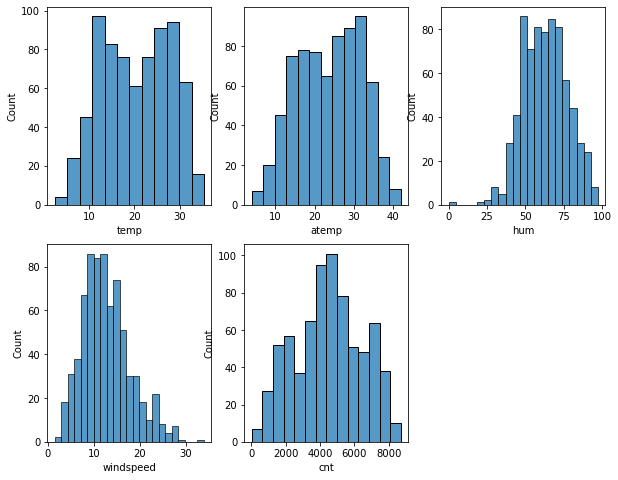

In [142]:
plt.figure(figsize = (10,8))

plt.subplot(2,3, 1)
sns.histplot(data=bikeSharingDF, x="temp")

plt.subplot(2,3, 2)
sns.histplot(data=bikeSharingDF, x="atemp")

plt.subplot(2,3, 3)
sns.histplot(data=bikeSharingDF, x="hum")

plt.subplot(2,3, 4)
sns.histplot(data=bikeSharingDF, x="windspeed")

plt.subplot(2,3, 5)
sns.histplot(data=bikeSharingDF, x="cnt")

Please note, in above plots, these are the distribution of variables accross all the records and Count of the bikes shared is differnt thing (we can have rough idea about that in the last plot though)

<AxesSubplot:>

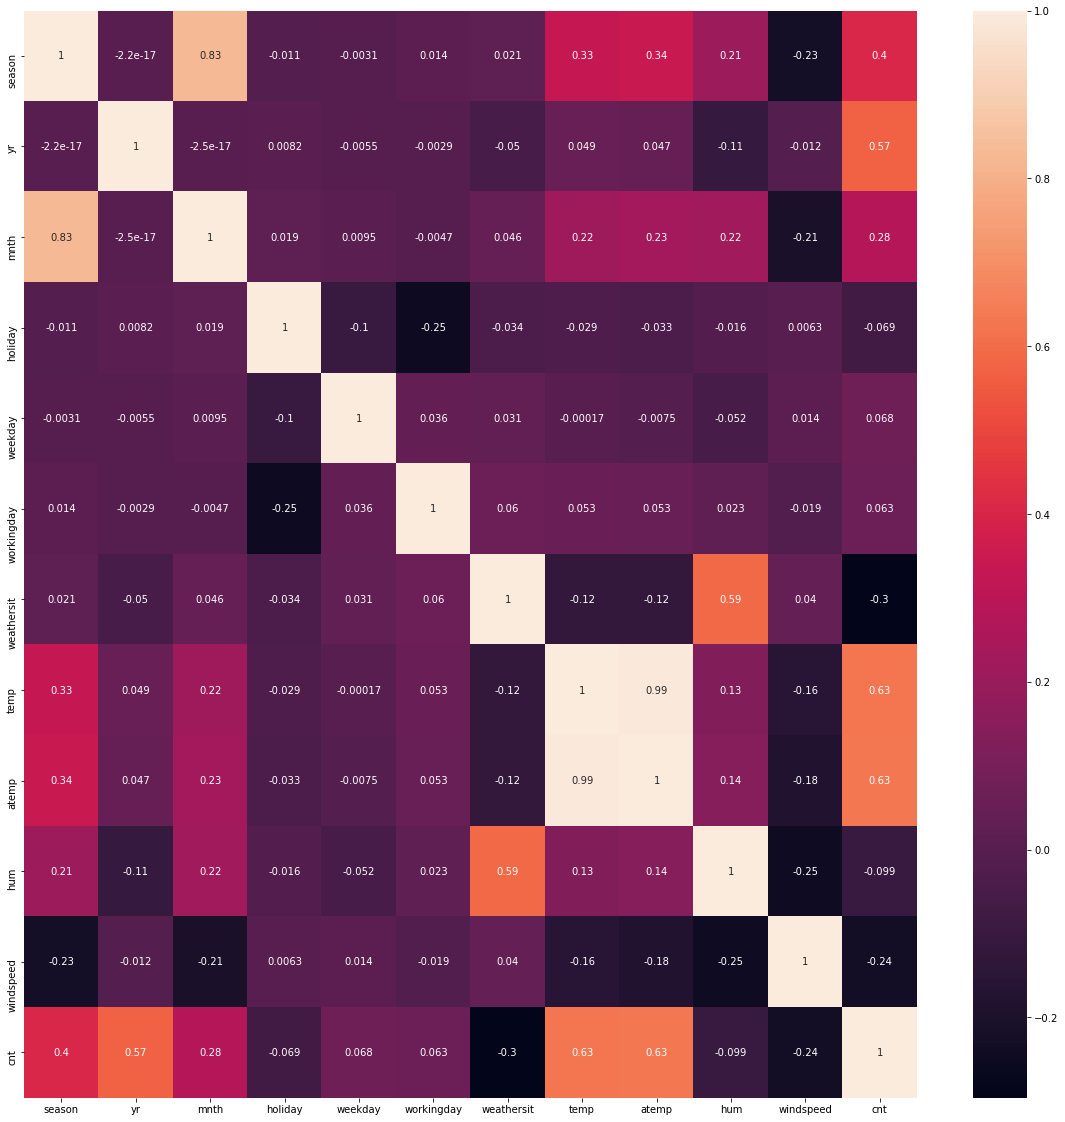

In [143]:
plt.figure(figsize = (20,20))
sns.heatmap(bikeSharingDF.corr(), annot = True)


<h5>Visulizing how different variables are behaving against the target variable</h5>

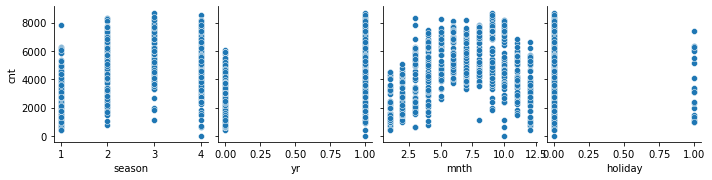

In [144]:
sns.pairplot(data = bikeSharingDF, x_vars = bikeSharingDF.columns[0:4], y_vars = ['cnt'], diag_kind = None)

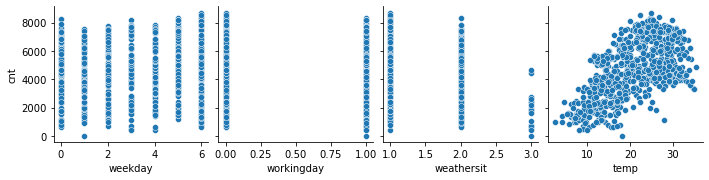

In [145]:
sns.pairplot(data = bikeSharingDF, x_vars = bikeSharingDF.columns[4:8], y_vars = ['cnt'], diag_kind = None)

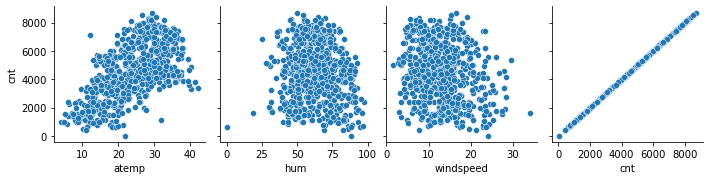

In [146]:
sns.pairplot(data = bikeSharingDF, x_vars = bikeSharingDF.columns[8:], y_vars = ['cnt'], diag_kind = None)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

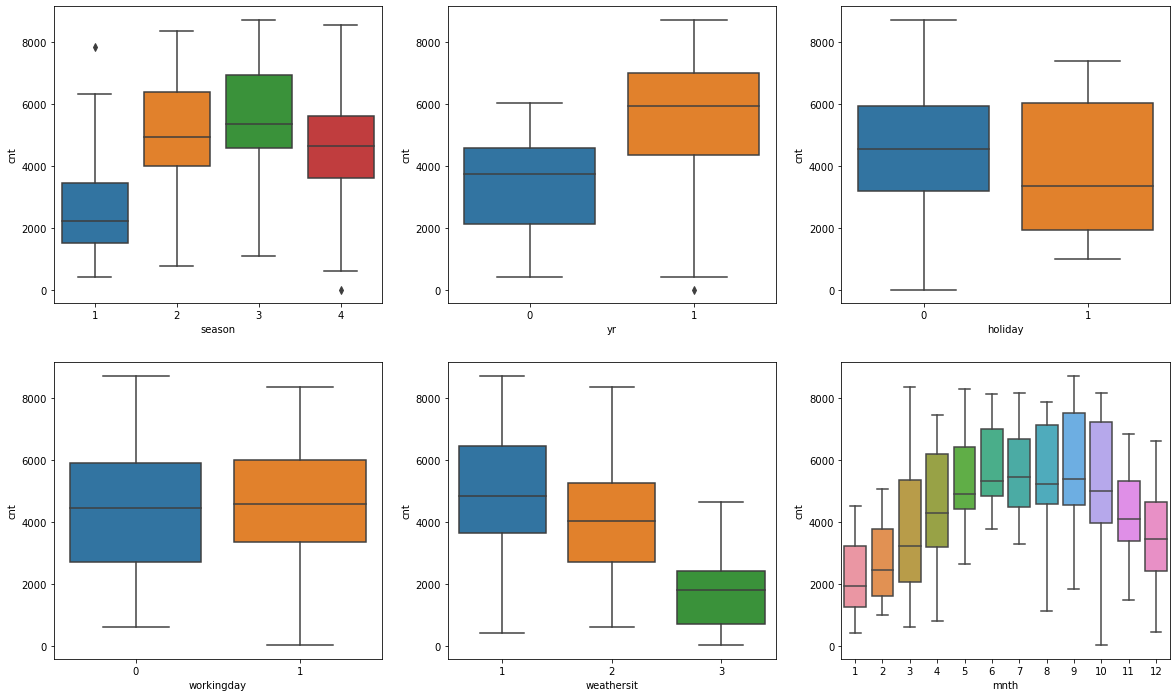

In [147]:
plt.figure(figsize = (20,12))

plt.subplot(2,3, 1)
sns.boxplot(x ='season', y ='cnt', data = bikeSharingDF)

plt.subplot(2,3, 2)
sns.boxplot(x ='yr', y ='cnt', data = bikeSharingDF)

plt.subplot(2,3, 3)
sns.boxplot(x ='holiday', y ='cnt', data = bikeSharingDF)

plt.subplot(2,3, 4)
sns.boxplot(x ='workingday', y ='cnt', data = bikeSharingDF)

plt.subplot(2,3, 5)
sns.boxplot(x ='weathersit', y ='cnt', data = bikeSharingDF)

plt.subplot(2,3, 6)
sns.boxplot(x ='mnth', y ='cnt', data = bikeSharingDF)


<h5>From above scattered plots and box plots, we can confirm that we can use linear regression model over this data</h5>

<h3>Handling Categorical variables</h3>

In [148]:
#As our main purpose is to understand how indipendant variable is affecting target variable and not just predicting,
#We will not drop the first category from dummy variables (will not use "drop_first = True")
def HandleCategoricalVariables(dataframe, variable):
    dataframe[variable] = dataframe[variable].apply(lambda x: variable + str(x))
    dummy = pd.get_dummies(dataframe[variable])
    dataframe = pd.concat([dataframe, dummy], axis = 1)
    dataframe = dataframe.drop(variable, axis = 1)
    return dataframe

In [149]:
bikeSharingDF = HandleCategoricalVariables(bikeSharingDF, 'season')
bikeSharingDF = HandleCategoricalVariables(bikeSharingDF, 'weathersit')
bikeSharingDF = HandleCategoricalVariables(bikeSharingDF, 'mnth')
bikeSharingDF = HandleCategoricalVariables(bikeSharingDF, 'weekday')

<h3>Getting Train and Test Datasets</h3>

In [150]:
bikeSharingDF_train, bikeSharingDF_test = train_test_split(bikeSharingDF, train_size = 0.7, random_state = 100)

In [151]:
print("Shape of Train dataset", bikeSharingDF_train.shape)
print("Shape of Test dataset", bikeSharingDF_test.shape)

Shape of Train dataset (510, 34)
Shape of Test dataset (220, 34)


In [152]:
bikeSharingDF_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season1', 'season2', 'season3', 'season4', 'weathersit1',
       'weathersit2', 'weathersit3', 'mnth1', 'mnth10', 'mnth11', 'mnth12',
       'mnth2', 'mnth3', 'mnth4', 'mnth5', 'mnth6', 'mnth7', 'mnth8', 'mnth9',
       'weekday0', 'weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5',
       'weekday6'],
      dtype='object')

<h3>Scalling Train dataset </h3>

In [153]:
scaler = MinMaxScaler()


num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikeSharingDF_train[num_vars] = scaler.fit_transform(bikeSharingDF_train[num_vars])
bikeSharingDF_train.head()

<ipython-input-153-08803567e8c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeSharingDF_train[num_vars] = scaler.fit_transform(bikeSharingDF_train[num_vars])
E:\Users\amitkumar.maheshwari\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season1,season2,...,mnth7,mnth8,mnth9,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


Separating Target variable and predictor variables

In [154]:
y_train = bikeSharingDF_train.pop('cnt')
X_train = bikeSharingDF_train

<H3>Fitting Linear Regression Model on train dataset</h3>

In [155]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

<h3>Feature Selection</h3>
<h5>Using RFE technique For Initial Feature Selection</h5>
We will use RFE for holistic feature selection and then will mannually analyse the summary and eleminate further as required

In [156]:
rfe = RFE(linearRegressionModel, 12)
rfe = rfe.fit(X_train, y_train)

E:\Users\amitkumar.maheshwari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [157]:
list(zip(X_train.columns, rfe.ranking_))

[('yr', 1),
 ('holiday', 1),
 ('workingday', 4),
 ('temp', 1),
 ('atemp', 9),
 ('hum', 1),
 ('windspeed', 1),
 ('season1', 1),
 ('season2', 12),
 ('season3', 1),
 ('season4', 1),
 ('weathersit1', 1),
 ('weathersit2', 2),
 ('weathersit3', 1),
 ('mnth1', 5),
 ('mnth10', 17),
 ('mnth11', 6),
 ('mnth12', 7),
 ('mnth2', 8),
 ('mnth3', 19),
 ('mnth4', 20),
 ('mnth5', 10),
 ('mnth6', 18),
 ('mnth7', 1),
 ('mnth8', 11),
 ('mnth9', 1),
 ('weekday0', 13),
 ('weekday1', 14),
 ('weekday2', 15),
 ('weekday3', 22),
 ('weekday4', 21),
 ('weekday5', 16),
 ('weekday6', 3)]

<h5>Mannual Cross-checking statistical parameters for selected Variables</h5>

In [158]:
def CalculateVIF(dataFrame):
    vif = pd.DataFrame()

    vif['Features'] = dataFrame.columns
    vif['VIF'] = [variance_inflation_factor(dataFrame.values, i) for i in range(dataFrame.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [159]:
def BuildAndFitModel(X_train, y_train):
    linerRegression = sm.OLS(y_train, X_train)
    linerRegressionModel = linerRegression.fit()
    print(linerRegressionModel.summary())
    return linerRegressionModel


In [160]:
rfeSupportedColumns = list(X_train.columns[rfe.support_])
rfeSupportedColumns

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season1',
 'season3',
 'season4',
 'weathersit1',
 'weathersit3',
 'mnth7',
 'mnth9']

In [161]:
X_train_rfe = X_train[rfeSupportedColumns]

In [162]:
#by default, statesmodel doesn't add constant variable in the model, so adding constant explicitly
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season1,season3,season4,weathersit1,weathersit3,mnth7,mnth9
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0,1,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0


In [163]:
linerRegressionModel = BuildAndFitModel(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.95e-190
Time:                        18:53:59   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2852      0.035      8.170      

In [164]:
CalculateVIF(X_train_rfe)

       Features    VIF
0         const  76.21
3          temp   3.61
7       season3   2.73
6       season1   2.55
4           hum   1.89
8       season4   1.87
9   weathersit1   1.61
11        mnth7   1.48
12        mnth9   1.30
5     windspeed   1.19
10  weathersit3   1.12
1            yr   1.03
2       holiday   1.02


We can see, P value of differnt variables, VIF of different variables, R squared value of model and F statistic of the model is looking good.
So going further, while checking the coefficient of variables, we could see season4 is having low coef.
Thus, lest try to drop it and observe the summary again

In [165]:
X_train_rfe = X_train_rfe.drop(['season4'], axis = 1)

In [166]:
linerRegressionModel = BuildAndFitModel(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.19e-189
Time:                        18:54:00   Log-Likelihood:                 503.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     498   BIC:                            -931.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3163      0.034      9.262      

In [167]:
CalculateVIF(X_train_rfe)

       Features    VIF
0         const  71.31
3          temp   3.05
7       season3   2.59
4           hum   1.85
6       season1   1.68
8   weathersit1   1.59
10        mnth7   1.47
11        mnth9   1.29
5     windspeed   1.18
9   weathersit3   1.11
1            yr   1.03
2       holiday   1.01


The same way as we did earlier, lets try to remove mnth7 and see

In [168]:
X_train_rfe = X_train_rfe.drop(['mnth7'], axis = 1)
linerRegressionModel = BuildAndFitModel(X_train_rfe, y_train)
CalculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.35e-188
Time:                        18:54:00   Log-Likelihood:                 499.08
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     499   BIC:                            -929.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3178      0.034      9.246      

Lets call it final as now we don't see significant low coef too.

<h5> Lets visulize selected feature against the target variables</h5>

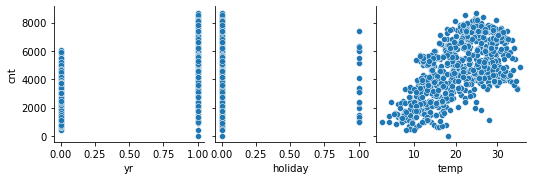

In [169]:
sns.pairplot(data = bikeSharingDF, x_vars = X_train_rfe.columns[1:4], y_vars = ['cnt'], diag_kind = None)

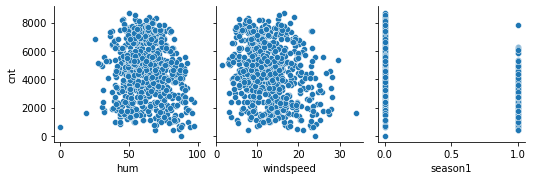

In [170]:
sns.pairplot(data = bikeSharingDF, x_vars = X_train_rfe.columns[4:7], y_vars = ['cnt'], diag_kind = None)

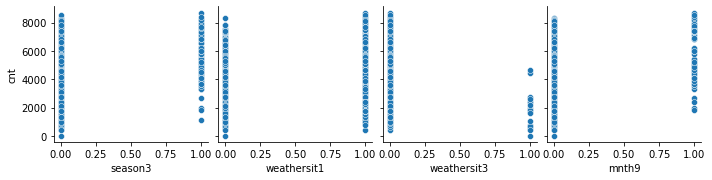

In [171]:
sns.pairplot(data = bikeSharingDF, x_vars = X_train_rfe.columns[7:], y_vars = ['cnt'], diag_kind = None)

<h5> Analysing the prediction of train dataset </h5>

In [172]:
y_train_predict = linerRegressionModel.predict(X_train_rfe)

Text(0, 0.5, 'y_train_predict')

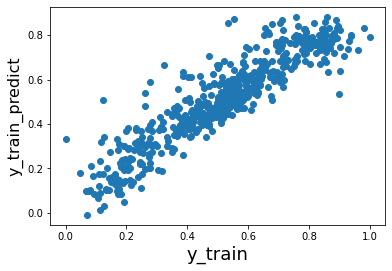

In [173]:
fig = plt.figure()
plt.scatter(y_train,y_train_predict)
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_predict', fontsize=16)  

In [174]:
#creating a Dataframe with original 'cnt' values and adjusted 'cnt' values
#we will then plot them together to see how well the model has predicted the values for cnt
y_data = pd.DataFrame()

y_data['Cnt'] = y_train
y_data['Cnt_predicted'] = y_train_predict

print(y_data.shape)
print(y_data.head())

(510, 2)
          Cnt  Cnt_predicted
576  0.827658       0.754522
426  0.465255       0.474263
728  0.204096       0.381283
482  0.482973       0.626429
111  0.191095       0.299206


<h5>Plotting Original value of 'Cnt' with predicted values </h5>

<AxesSubplot:>

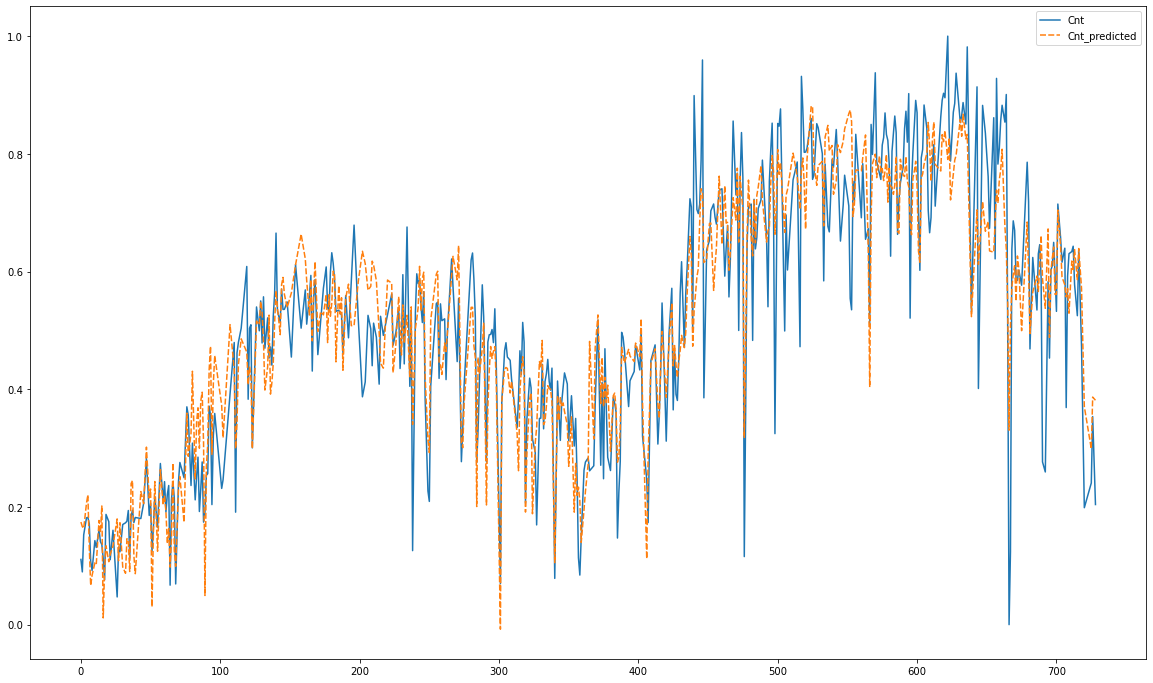

In [175]:
plt.figure(figsize = (20,12))
sns.lineplot(data=y_data)

From above plot, we can see the line of predicted values are almost falling on the original line.

Meaning, Model is predicted very well.

<h3>Analysing Residuals for this model</h3>

<h5> Assumptions on Error</h5>

* Mean should be centered to 0
* Errors sould have constant variation
* Errors should be indipendant - There should not be any patterns if we plot them

E:\Users\amitkumar.maheshwari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

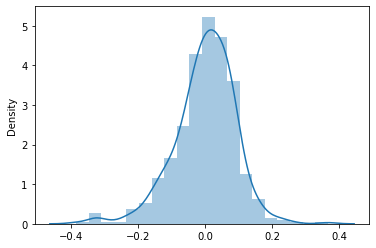

In [176]:
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)

In [177]:
print("Mean of the Errors:", (y_train - y_train_predict).mean())

Mean of the Errors: 3.744281573245626e-17


As we can see, Mean of Errors are very much centered to 0.

Text(0, 0.5, 'Errors')

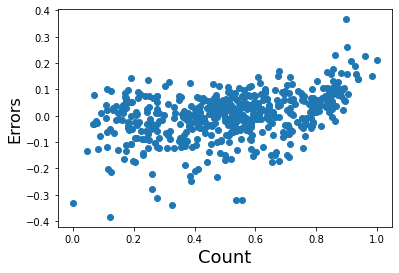

In [178]:
fig = plt.figure()
plt.scatter(y_train, (y_train - y_train_predict))
plt.xlabel('Count', fontsize=18)                          
plt.ylabel('Errors', fontsize=16) 

<AxesSubplot:ylabel='errors'>

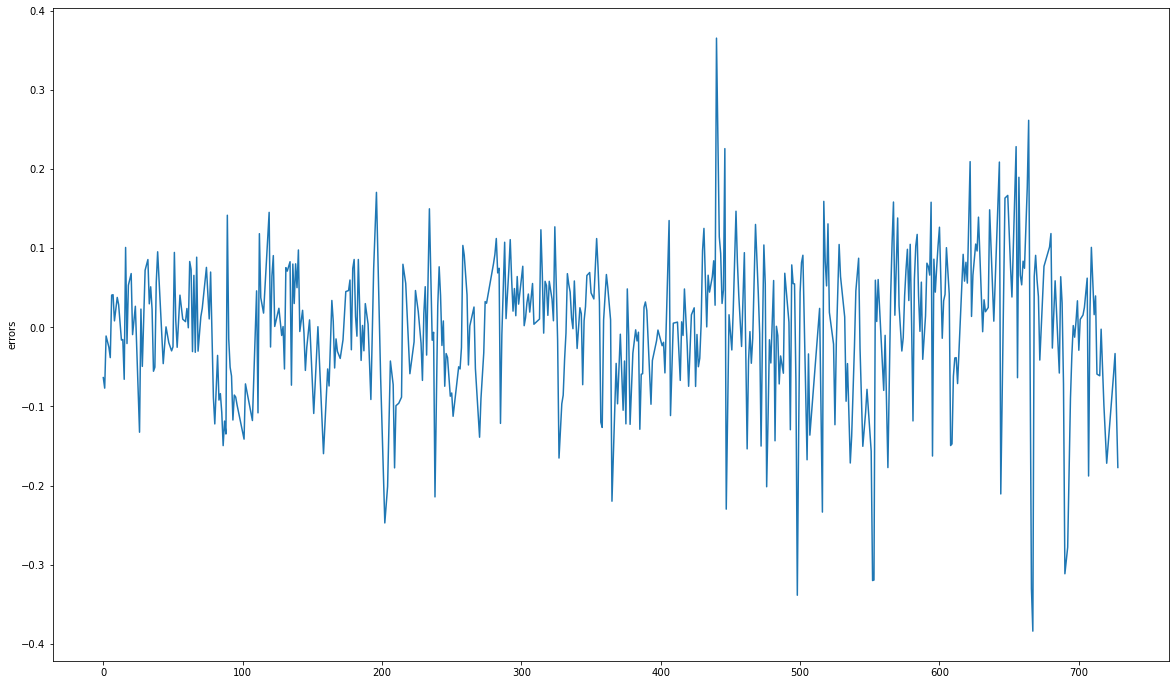

In [197]:
y_data['errors'] = y_data["Cnt"] - y_data["Cnt_predicted"]
plt.figure(figsize = (20,12))
sns.lineplot(data = y_data["errors"])

we can confirm the other assumptions from the above plot

* We don't see any patterns in the errors (residuals => y_train - y_train_predicted)
* Also, we can see it has almost constant variation between -0.2 to 0.2

<h3>Evaluation - Applying the model on Test Dataset</h3>

In [179]:
print(num_vars)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [180]:
bikeSharingDF_test[num_vars] = scaler.transform(bikeSharingDF_test[num_vars])

<ipython-input-180-e9306c8ea2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeSharingDF_test[num_vars] = scaler.transform(bikeSharingDF_test[num_vars])
E:\Users\amitkumar.maheshwari\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [181]:
bikeSharingDF_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season1,season2,...,mnth7,mnth8,mnth9,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,1,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [182]:
y_test = bikeSharingDF_test.pop('cnt')
X_test = bikeSharingDF_test

In [183]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season1,season2,...,mnth7,mnth8,mnth9,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,1,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,1,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,1,0,0,0,0,1,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,1,0,0


In [184]:
X_test = X_test[X_train_rfe.columns]

In [185]:
y_test_predict = linerRegressionModel.predict(X_test)

Text(0, 0.5, 'y_test')

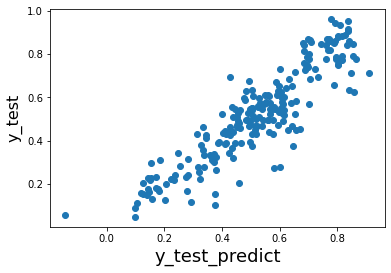

In [186]:
fig = plt.figure()
plt.scatter(y_test_predict, y_test)
plt.xlabel('y_test_predict', fontsize=18)                          
plt.ylabel('y_test', fontsize=16)  

In [187]:
y_test_data = pd.DataFrame()

y_test_data['Cnt_test'] = y_test
y_test_data['Cnt_test_predicted'] = y_test_predict

print(y_test_data.shape)
print(y_test_data.head())

(220, 2)
     Cnt_test  Cnt_test_predicted
184  0.692706            0.428192
535  0.712034            0.912502
299  0.303382            0.373885
221  0.547400            0.582740
152  0.569029            0.612450


<h5>Plotting Original value of 'Cnt' with predicted values For test dataset </h5>

<AxesSubplot:>

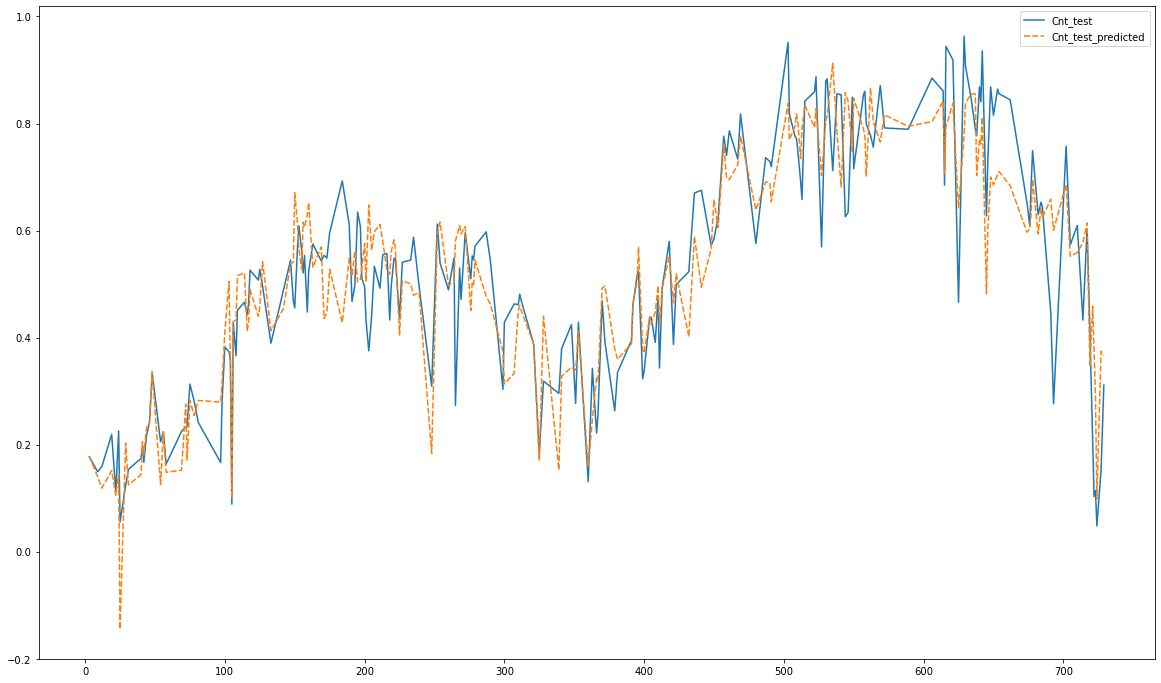

In [188]:
plt.figure(figsize = (20,12))
sns.lineplot(data=y_test_data)

<h5>Checking the R square and Adjusted R square values of the model on test dataset </h5>

In [189]:
r_squared_test = r2_score(y_test, y_test_predict)
print("R square value of the final model for test dataset is:", r_squared_test)

R square value of the final model for test dataset is: 0.8091483843045847


Adjusted R-square = 1 - ((1-R^2)(N-1)) / N - p - 1

In [190]:
Adj_R2 = 1 - ((1- r_squared_test) * (X_test.shape[0] - 1)) / (X_test.shape[0] - (X_test.shape[1] - 1) - 1)
print("Adjusted R square value of the final model for test dataset is:", Adj_R2)

Adjusted R square value of the final model for test dataset is: 0.8000167280512156


<h3>Final Equation</h3>

We know the equation of Multiple Linear Regression is,

y = C + m1 * X1 + m2 * X2 + ... + mp * Xp

    Where, C is the constant where line would itercet the y axis
            m1, m2,..mp are coefficient associated with X1, X2,...Xp independent predictive variables 

From the summary we got from our final regression model, we got the values for all these.

Putting the values in the eqation,


<b>y = 
    
    0.3178 
    + 0.4719 * temp  
	+ 0.2312 * yr 
    + 0.1004 * mnth9
    + (-0.1887) * windspeed	
    + (-0.1818) * weathersit3
    + (-0.1462) * hum
    + (-0.1418) * season1
    + (-0.0907) * holiday 
    + (-0.0795) * season3
    + 0.0563 * weathersit1
    
    
</b>

<h3>Interpretation</h3>

Basic understanding of Linear Regression Model Equation is,

"A unit increase in any independent variable 'X' increases the value of dependent variable 'y' by its coefficient 'm' times, given that all other independent variable's value are kept constant."

Meaning, if the value of X1 is increased by 1, the value of y will be increased by m1 times when all other independent variables (X2, X3,.., Xp)'s value was kept constant (as it was earlier).

------------

<h5> Data Dictionary </h5>

|Variable|Meaning|
|---|---|
|temp|Temperature|
|yr|Year - 0 indicates 2018, while 1 indicates 2019|
|mnth9|September Month|
|windspeed|Speed of Wind|
|weathersit3|Light Snow, Light Rain + Thunderstorm + Scattered clouds|
|hum|Humidity|
|season1|Spring Season|
|holiday|Indicates that the day is holiday|
|season3|Fall Season|
|weathersit1|Clear, Few clouds, Partly cloudy, Partly cloudy|
    
---

<h5>Please note</h5>

Above interpretation of "Unit Change" in different variables can be directly imply for "temp", "hum", "windspeed" as it has mentioned. Because they are continious (numerical) variables.

But "mnth9", "yr", "weathersit1", "weathersit3", "season1", "holiday", and "season3" are binary variables. Meaning 0 value for this variable indicates the absense of this parameter while 1 value indicates the presence.

So, for this variables, we can say, the presence of this variables will increase/decrease the value of "cnt" by above mentioned times when keeping all other variables constant.

---

Applying the same understanding for our derived MLR equation we can interpreat as,

<h4>A unit change in either</h4>

* "temp"         variable will increase the value of cnt by 0.4719 times
* "windspeed"    variable will decrease the value of cnt by 0.1887 times 
* "hum"          variable will decrease the value of cnt by 0.1462 times

When all the independent (predictive) variables are kept constant.

OR

<h4>Presence of either</h4>

* "yr"           variable will increase the value of cnt by 0.2312 times
* "mnth9"        variable will increase the value of cnt by 0.1004 times
* "weathersit1"  variable will increase the value of cnt by 0.0563 times
* "weathersit3"  variable will decrease the value of cnt by 0.1818 times
* "season1"      variable will decrease the value of cnt by 0.1418 times
* "holiday"      variable will decrease the value of cnt by 0.0907 times
* "season3"      variable will decrease the value of cnt by 0.0563

When all the independent (predictive) variables are kept constant.

----

From abover Interpretation, We can clearly see that,

* Temperature is the most signficant factor that boosts the demand of the bikes.
* Also, we can see, demand of bikes are also increasing by the year passing (probably people are naturally getting more aware about the nature or fitness)
* Also, September month, clear weather seems to be boosting the demand of bikes
While,
* High windspeed and rainy/snowy weather is dropping the demand the most.
* High humidity, spring/fall, holidays are other facators that may drop the demand of the bikes.

Company should keep these pointer in mind while making any stratagy.
